In [1]:
import pandas as pd
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

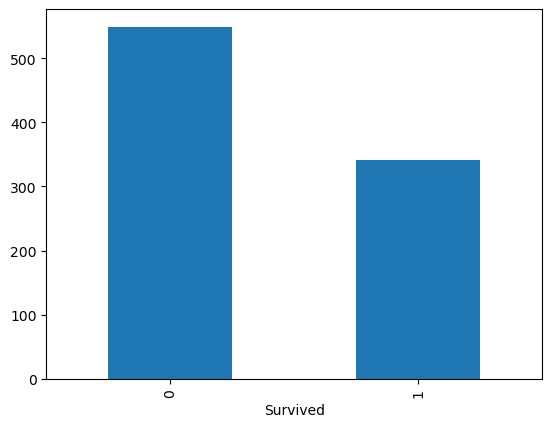

In [18]:
df["Survived"].value_counts().plot(kind="bar")

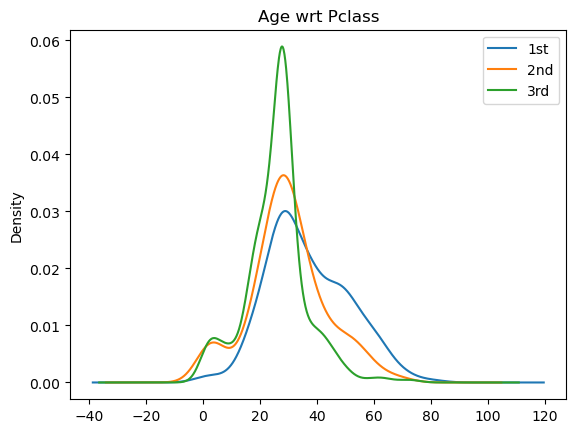

In [20]:
import matplotlib.pyplot as plt
l=[1,2,3]
for x in l:
    df.Age[df.Pclass==x].plot(kind="kde")
    plt.title("Age wrt Pclass")
    plt.legend(("1st","2nd","3rd"))

In [2]:
df=df.drop(['Ticket','Cabin','Name'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


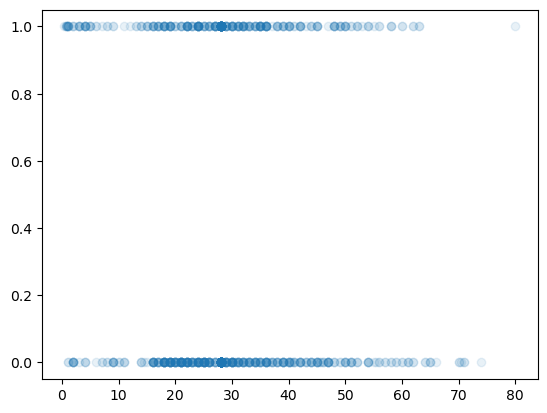

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df["Age"],df["Survived"],alpha=0.1)

In [3]:
df['Family']=df['SibSp']+df['Parch']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0
887,888,1,1,female,19.0,0,0,30.0000,S,0
888,889,0,3,female,NaN,1,2,23.4500,S,3
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [4]:
df=df.drop(['SibSp','Parch'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,0
887,888,1,1,female,19.0,30.0000,S,0
888,889,0,3,female,NaN,23.4500,S,3
889,890,1,1,male,26.0,30.0000,C,0


In [5]:
df.shape

(891, 8)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,1,22.0,7.2500,2,1
1,2,1,1,0,38.0,71.2833,0,1
2,3,1,3,0,26.0,7.9250,2,0
3,4,1,1,0,35.0,53.1000,2,1
4,5,0,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,2,0
887,888,1,1,0,19.0,30.0000,2,0
888,889,0,3,0,NaN,23.4500,2,3
889,890,1,1,1,26.0,30.0000,0,0


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,32.204208,1.538721,0.904602
std,257.353842,0.486592,0.836071,0.477990,14.526497,49.693429,0.794231,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,14.454200,2.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,3.000000,10.000000


In [8]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,0.012658,0.013083,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,0.257307,-0.163517,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,-0.549500,0.157112,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.182333,0.104057,-0.200988
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,0.096067,-0.025252,-0.301914
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,1.000000,-0.221226,0.217138
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.025252,-0.221226,1.000000,0.064701
Family,-0.040143,0.016639,0.065997,-0.200988,-0.301914,0.217138,0.064701,1.000000


<Axes: >

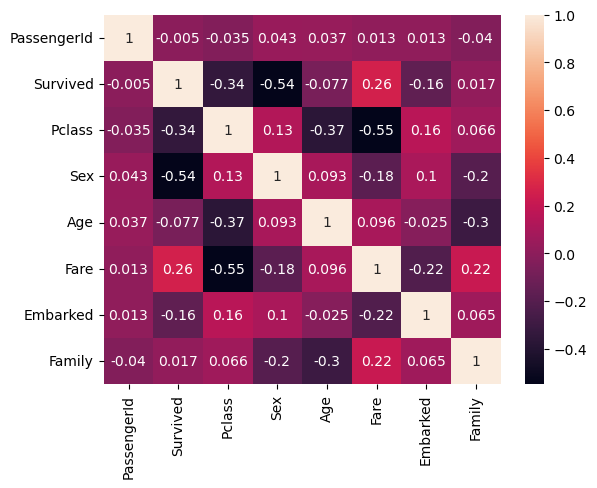

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         0
Family           0
dtype: int64

In [11]:
df=df.fillna(df.median())

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [13]:
x=df.drop(['Survived'],axis=1)
x

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,1,3,1,22.0,7.2500,2,1
1,2,1,0,38.0,71.2833,0,1
2,3,3,0,26.0,7.9250,2,0
3,4,1,0,35.0,53.1000,2,1
4,5,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...,...
886,887,2,1,27.0,13.0000,2,0
887,888,1,0,19.0,30.0000,2,0
888,889,3,0,28.0,23.4500,2,3
889,890,1,1,26.0,30.0000,0,0


In [14]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.1, random_state=42)


x_train.shape



(801, 7)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
lr= LogisticRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)
print("Accuracy score of the model is ",accuracy_score(y_test,predictions))
print("Precision score of the model is ",precision_score(y_test, predictions))


Accuracy score of the model is  0.8222222222222222
Precision score of the model is  0.7631578947368421


C:\Users\Angel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
